In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

In [12]:
df = pd.read_csv('C:/Users/culle/Documents/bills/bill_3.csv')

In [13]:
df['time'] = pd.to_datetime(df['time'])
df = df.sort_values('time')

In [30]:
df.head()

,time,cost,cost_lag1,cost_lag2,cost_lag3,cost_lag4,cost_lag5,cost_lag6,cost_lag7,cost_lag8,...,cost_lag341,cost_lag342,cost_lag343,cost_lag344,cost_lag345,cost_lag346,cost_lag347,cost_lag348,cost_lag349,cost_lag350
0,2022-06-20,1.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-06-21,1.64,1.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-06-22,2.38,1.64,1.53,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-06-23,1.52,2.38,1.64,1.53,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-06-24,3.04,1.52,2.38,1.64,1.53,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df.tail()

,time,cost,cost_lag1,cost_lag2,cost_lag3,cost_lag4,cost_lag5,cost_lag6,cost_lag7,cost_lag8,...,cost_lag341,cost_lag342,cost_lag343,cost_lag344,cost_lag345,cost_lag346,cost_lag347,cost_lag348,cost_lag349,cost_lag350
347,2023-06-02,21.44,26.03,24.10,22.20,18.78,9.05,11.20,17.37,27.75,...,1.52,1.52,3.04,1.52,2.38,1.64,1.53,NaN,NaN,NaN
348,2023-06-03,23.22,21.44,26.03,24.10,22.20,18.78,9.05,11.20,17.37,...,3.83,1.52,1.52,3.04,1.52,2.38,1.64,1.53,NaN,NaN
349,2023-06-04,20.48,23.22,21.44,26.03,24.10,22.20,18.78,9.05,11.20,...,1.52,3.83,1.52,1.52,3.04,1.52,2.38,1.64,1.53,NaN
350,2023-06-05,31.62,20.48,23.22,21.44,26.03,24.10,22.20,18.78,9.05,...,1.52,1.52,3.83,1.52,1.52,3.04,1.52,2.38,1.64,1.53
351,2023-06-06,33.92,31.62,20.48,23.22,21.44,26.03,24.10,22.20,18.78,...,1.38,1.52,1.52,3.83,1.52,1.52,3.04,1.52,2.38,1.64


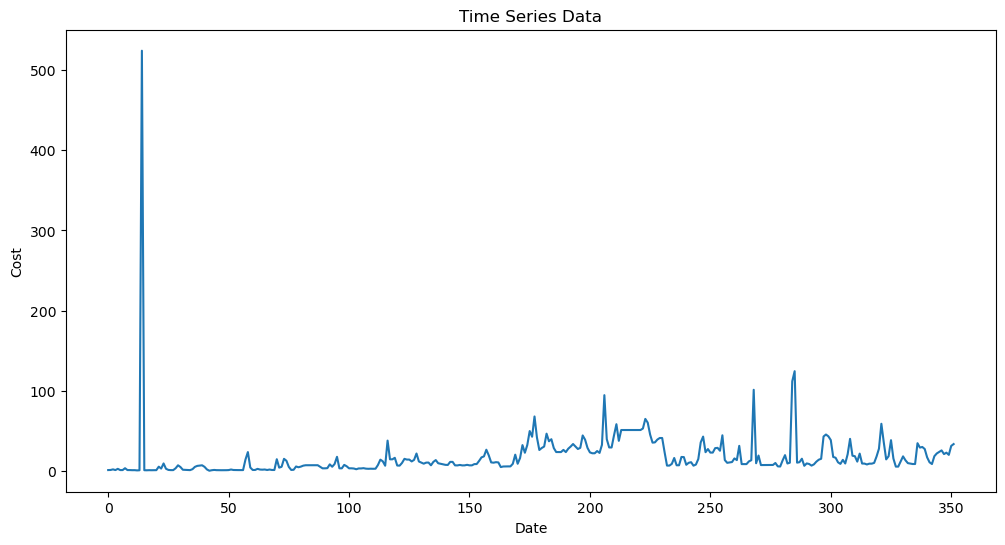

In [15]:
#visualizing data
df['cost'].plot(figsize = (12,6))
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Cost')
plt.show()

In [16]:
#351 days is the difference
date_difference = df['time'].iloc[-1] - df['time'].iloc[0]

In [18]:
window_size = 350

for i in range(1, window_size + 1):
    df[f'cost_lag{i}'] = df['cost'].shift(i)


C:\Users\culle\AppData\Local\Temp\ipykernel_26308\1622723258.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'cost_lag{i}'] = df['cost'].shift(i)
C:\Users\culle\AppData\Local\Temp\ipykernel_26308\1622723258.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'cost_lag{i}'] = df['cost'].shift(i)
C:\Users\culle\AppData\Local\Temp\ipykernel_26308\1622723258.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

In [19]:
train_data = df[:-5]  # Exclude the last 5 rows for testing
test_data = df[-5:] 

In [20]:
#train model
model = xgb.XGBRegressor()
model.fit(train_data.drop(['time', 'cost'], axis=1), train_data['cost'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [23]:
future_dates = pd.date_range(start = '2023-06-02',periods = 5, freq = 'D')
future_df = pd.DataFrame({'time': future_dates})

In [24]:
for i in range(1, window_size + 1):
    future_df[f'cost_lag{i}'] = df['cost'].shift(i)
    

C:\Users\culle\AppData\Local\Temp\ipykernel_26308\3617630251.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_df[f'cost_lag{i}'] = df['cost'].shift(i)
C:\Users\culle\AppData\Local\Temp\ipykernel_26308\3617630251.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_df[f'cost_lag{i}'] = df['cost'].shift(i)
C:\Users\culle\AppData\Local\Temp\ipykernel_26308\3617630251.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.

In [25]:
future_predictions = model.predict(future_df.drop('time', axis=1))

In [26]:
#print predictions
for date, prediction in zip(future_dates, future_predictions):
    print(f"Prediction for {date}: {prediction}")

Prediction for 2023-06-02 00:00:00: 1.5351396799087524
Prediction for 2023-06-03 00:00:00: 1.6386393308639526
Prediction for 2023-06-04 00:00:00: 2.346146821975708
Prediction for 2023-06-05 00:00:00: 1.5300264358520508
Prediction for 2023-06-06 00:00:00: 3.027240753173828
